<a href="https://colab.research.google.com/github/gurmeshsingh/Titanic-Survival-Prediction-model/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


# **Data collection and processing**

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')
titanic_data.head(100)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Handling the missing values

In [ ]:
# remove cabin column
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
# remove name column
titanic_data = titanic_data.drop(columns='Name', axis=1)
# remove ticket column
titanic_data = titanic_data.drop(columns='Ticket', axis=1)
# remove passangerid column
titanic_data = titanic_data.drop(columns='PassengerId', axis=1)

In [ ]:
#replacing age values with their mean in empty spaces
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data.isnull().sum()

/tmp/ipython-input-1738503174.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# replacing missing embarked values with mode of embarked column
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.isnull().sum()

/tmp/ipython-input-2742265662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## **Data Analysis**

In [ ]:
titanic_data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


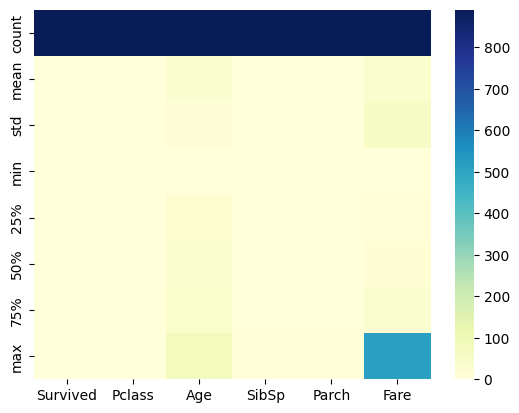

In [ ]:
 sns.heatmap(titanic_data.describe(),cmap='YlGnBu')
 plt.show()

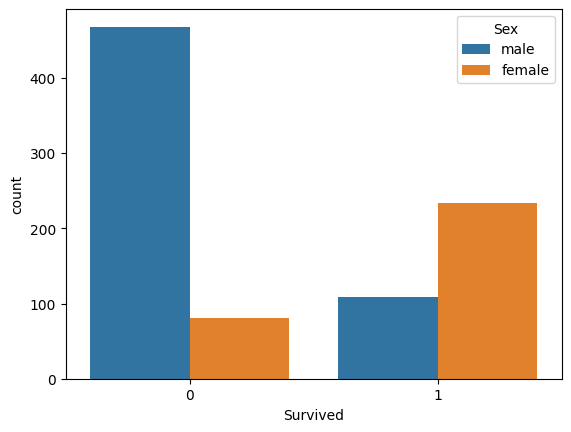

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.show()

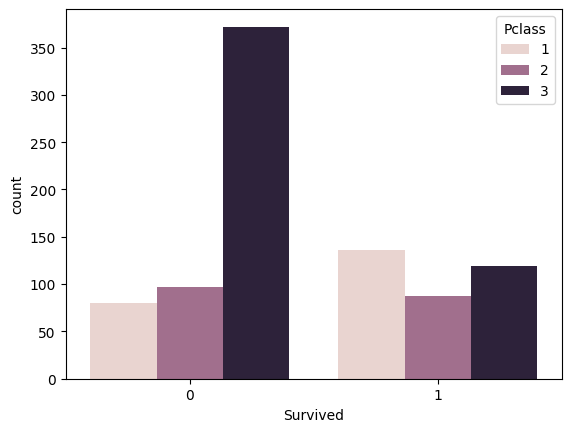

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.show()

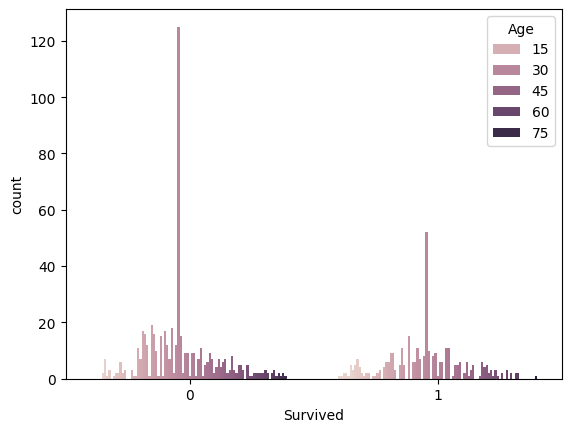

In [ ]:
sns.countplot(x='Survived', hue='Age', data=titanic_data)
plt.show()

In [ ]:
# convert embarked to numeric values
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [ ]:
#convert sex to 0 and 1
titanic_data['Sex'] = titanic_data['Sex'].map({'male':0, 'female':1})

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
y=titanic_data['Survived']
X=titanic_data.drop(columns='Survived', axis=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X, y)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
# 1. Load the test data
test_df = pd.read_csv('test.csv')
# Keep the original PassengerId for the submission file
passenger_ids = test_df['PassengerId']

# 2. Preprocess the Test Data (exactly like the training data)
# Drop the same columns
test_df = test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Handle missing values using the MEDIAN from the TRAINING data to avoid data leakage
# There is one missing Fare value in the test set
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Convert categorical features to numeric
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
#convert embarked to numeric values
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q':2})

# 3. Scale the Test Features
# Use the SAME scaler that was fitted on the training data
X_test_final = scaler.transform(test_df)

# 4. Make Predictions
# Use the trained model to predict survival on the processed test data
final_predictions = model.predict(X_test_final)

# 5. Create the Submission File
# Create a new DataFrame with PassengerId and the predicted Survived status
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': final_predictions
})

# 6. Save the Submission File to CSV
# The 'index=False' is important for the submission format
submission_df.to_csv('titanic_submission.csv', index=False)

print("Submission file 'titanic_submission.csv' created successfully!")

Submission file 'titanic_submission.csv' created successfully!


/tmp/ipython-input-4186716549.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
/tmp/ipython-input-4186716549.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
from sklearn.metrics import accuracy_score

# Assume 'final_predictions' is the variable holding your model's predictions
# on the test set, from the code in the previous step.

# 1. Load the ground truth answers from the submission file
solution_df = pd.read_csv('gender_submission.csv')
true_answers = solution_df['Survived']

# 2. Compare your model's predictions with the true answers
# 'final_predictions' contains your model's output
# 'true_answers' contains the correct outcomes
accuracy_on_test_data = accuracy_score(true_answers, final_predictions)

print(f"The accuracy of your model on the final test data is: {accuracy_on_test_data:.4f}")

The accuracy of your model on the final test data is: 0.6746


Accuracy: 0.8047

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.83      0.87      0.85       549
    Survived       0.77      0.71      0.74       342

    accuracy                           0.80       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891

Confusion Matrix:
[[475  74]
 [100 242]]


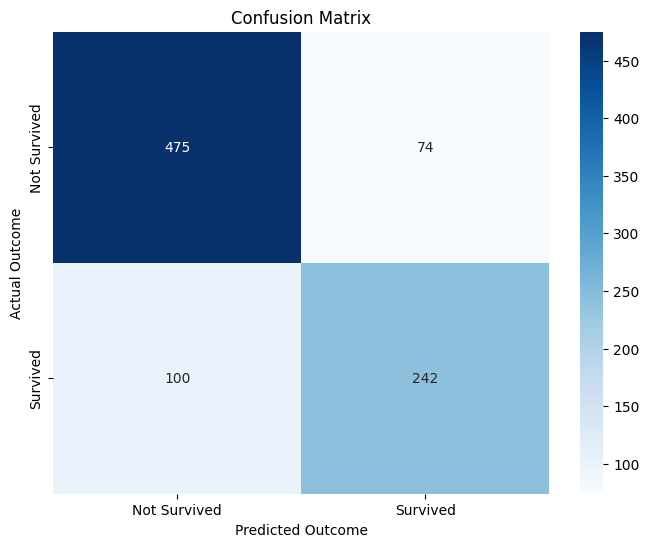

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# 1. Make Predictions on the Test Data
# Use the trained model to predict the outcomes for the test set.
y_pred = model.predict(X)


# 2. Evaluate the Predictions

# Calculate Accuracy
# This shows the overall percentage of correct predictions.
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Display a Detailed Classification Report
# This breaks down performance by class (Survived vs. Not Survived).
print("Classification Report:")
print(classification_report(y, y_pred, target_names=['Not Survived', 'Survived']))


# Display the Confusion Matrix
# This shows the number of correct and incorrect predictions for each class.
print("Confusion Matrix:")
cm = confusion_matrix(y, y_pred)
print(cm)

# For better readability, let's visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')
plt.title('Confusion Matrix')
plt.show()